In [2]:
import numpy as np
import matplotlib.pyplot as plt

# SGDRegressor has a gradient descent regression model
# StandartScaler is used for std normalization
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [3]:
# Loding data from text file
def load_from_text():
    data = np.loadtxt("./data/houses.txt", delimiter=",")
    x = data[:,:4]
    y = data[:,4]
    return x, y

In [4]:
# x_tdata is the input variable
# y_tdata is the target
x_tdata, y_tdata = load_from_text()

print(f"x_tdata = {x_tdata}")
print(f"y_tdata = {y_tdata}")

x_label_names = np.array(["Size(sqft)", "Bedrooms", "Floors", "Age"])
y_label_name = "Price (k)"

x_tdata = [[1.652e+03 2.000e+00 1.000e+00 2.100e+01]
 [1.088e+03 2.000e+00 1.000e+00 3.500e+01]
 [1.694e+03 3.000e+00 1.000e+00 1.300e+01]
 [1.073e+03 2.000e+00 1.000e+00 1.000e+02]
 [1.419e+03 3.000e+00 2.000e+00 1.900e+01]
 [2.183e+03 3.000e+00 1.000e+00 5.200e+01]
 [1.396e+03 3.000e+00 2.000e+00 2.340e+01]
 [1.208e+03 2.000e+00 1.000e+00 1.550e+01]
 [8.820e+02 3.000e+00 1.000e+00 4.900e+01]
 [2.030e+03 4.000e+00 2.000e+00 4.500e+01]
 [1.216e+03 2.000e+00 2.000e+00 7.400e+01]
 [2.482e+03 4.000e+00 2.000e+00 1.600e+01]
 [1.660e+03 3.000e+00 2.000e+00 1.900e+01]
 [1.099e+03 2.100e+00 2.100e+00 9.500e+01]
 [1.775e+03 3.000e+00 2.000e+00 2.800e+01]
 [2.030e+03 4.000e+00 2.000e+00 4.500e+01]
 [1.784e+03 4.000e+00 2.000e+00 1.170e+02]
 [1.073e+03 2.000e+00 1.000e+00 1.000e+02]
 [1.953e+03 3.000e+00 2.000e+00 1.600e+01]
 [1.324e+03 2.000e+00 2.000e+00 1.200e+01]
 [1.616e+03 3.000e+00 1.000e+00 1.600e+01]
 [8.160e+02 2.000e+00 1.000e+00 5.800e+01]
 [1.349e+03 3.100e+00 1.000e+00 2.100e+01]
 

In [5]:
# Setup the data structure to normalize the data
normalizer = StandardScaler()
x_norm = normalizer.fit_transform(x_tdata)

In [6]:
# Create and fit regression model
gdlr = SGDRegressor(max_iter = 1000)
gdlr.fit(x_norm, y_tdata)
print(gdlr)
print(f"number of iterations completed: {gdlr.n_iter_}, number of weight updates: {gdlr.t_}")

SGDRegressor()
number of iterations completed: 131, number of weight updates: 9826.0


In [7]:
# We can fetch the parameters, but we have to remember, that those are for normalized data
b_norm = gdlr.intercept_
a_norm = gdlr.coef_
print(f"model parameters: w: {a_norm}, b:{b_norm}")

model parameters: w: [ 72.74716452 -19.75849637 -22.69688504 -45.08491108], b:[351.07907932]


In [45]:
# Make a prediction based on the model we built using sgdr.predict()
y_pred_gdlr = gdlr.predict(x_norm)
y_pred = np.dot(x_norm, a_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_tdata).all()}")
print(f"Prediction on training set:\n{y_pred_gdlr[:4]}" )
print(f"Computed predictions with fetched params:\n{y_pred[:4]}" )
print(f"Target values \n{y_tdata[:4]}")

prediction using np.dot() and sgdr.predict match: False
Prediction on training set:
[474.48293217 333.91156293 466.39009953 219.89172041]
Computed predictions with fetched params:
[474.48293217 333.91156293 466.39009953 219.89172041]
Target values 
[502.   340.   490.7  216.96]


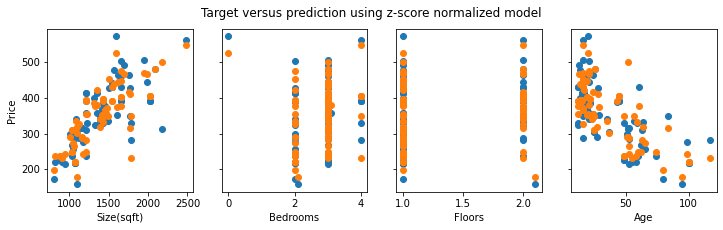

In [34]:
# Plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_tdata[:,i],y_tdata, label = 'target')
    ax[i].set_xlabel(x_label_names[i])
    ax[i].scatter(x_tdata[:,i],y_pred_gdlr, label = 'predict')
ax[0].set_ylabel("Price")
fig.suptitle("Target versus prediction using z-score normalized model")
plt.show()

In [38]:
# Another "closed-form" solution for linear regression
# It has to be faster for smaller data sets
linear_model = LinearRegression()
linear_model.fit(x_tdata, y_tdata)

LinearRegression()

In [8]:
# Fetching parameters
b = linear_model.intercept_
a = linear_model.coef_
print(f"a = {a:}, b = {b:0.2f}")

NameError: name 'linear_model' is not defined

In [41]:
print(f"Prediction on training set:\n {linear_model.predict(x_tdata)[:4]}" )
print(f"prediction using w,b:\n {(x_tdata @ a + b)[:4]}")
print(f"Target values \n {y_tdata[:4]}")

Prediction on training set:
 [474.73048913 333.84516506 466.57388754 219.98393717]
prediction using w,b:
 [474.73048913 333.84516506 466.57388754 219.98393717]
Target values 
 [502.   340.   490.7  216.96]
